In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


In [5]:
#load client_data_csv and price_data.csv  into individual dataframe.
client_df = pd.read_csv('/Users/apple/Downloads/client_data.csv')
price_df = pd.read_csv('/Users/apple/Downloads/price_data.csv')

In [6]:
client_df.head(4)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [7]:
#using descriptive statistics to understand your data(EDA)
client_df.info()
#client_df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [11]:
# This function, plot_stacked_bars, creates a stacked bar chart from a given DataFrame, 
# which could represent data on customer retention (customers who stay) and churn (customers who leave).

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # The annotate_stacked_bars function is called to add text labels on top of each segment of the bars, 
    # which will show the exact values for each part.
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

    
# This function, annotate_stacked_bars, adds text annotations to each segment of the bars
# which makes it easier to see the exact values of each stacked section.

    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

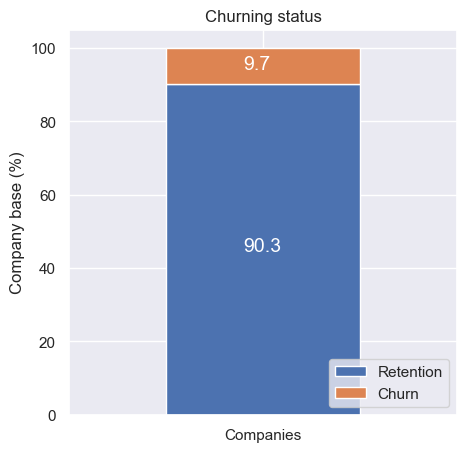

In [12]:
#Building the Plot_stacked_bars
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

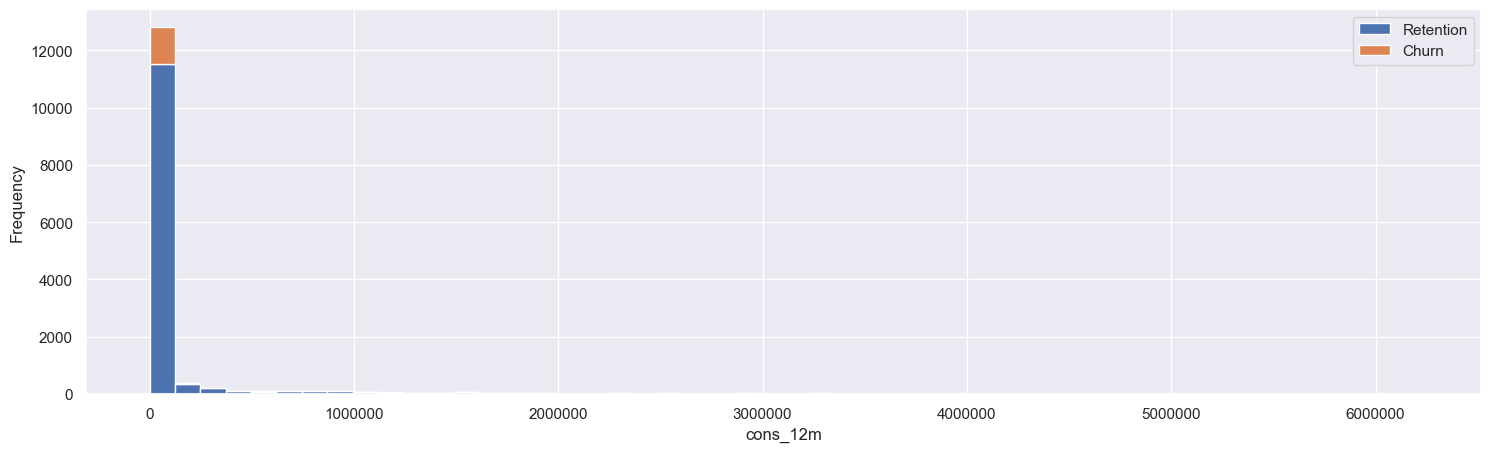

In [13]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)


In [14]:
# Check for any missing values in the 'num_years_antig' column
print("Missing values in num_years_antig:", client_df['num_years_antig'].isna().sum())

Missing values in num_years_antig: 0


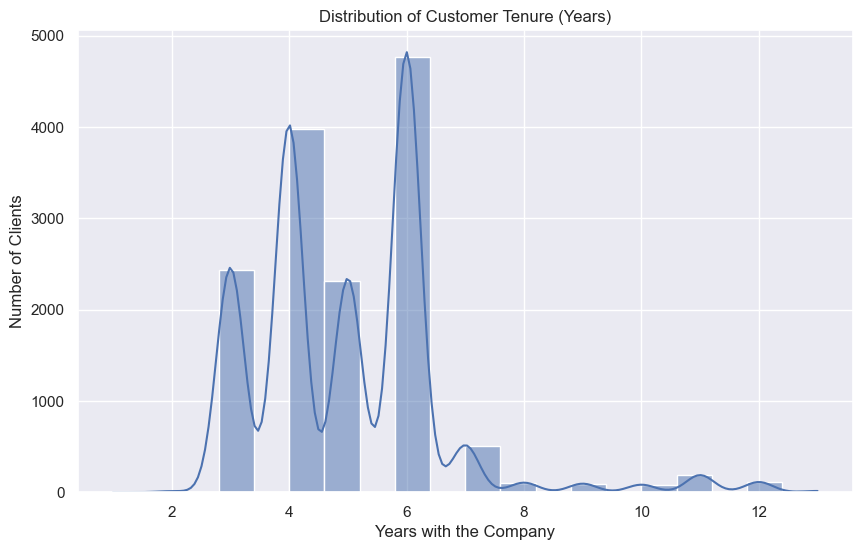

In [15]:
# Histogram of customer tenure
plt.figure(figsize=(10, 6))
sns.histplot(client_df['num_years_antig'], bins=20, kde=True)
plt.title('Distribution of Customer Tenure (Years)')
plt.xlabel('Years with the Company')
plt.ylabel('Number of Clients')
plt.show()

#most customers are relatively new to the company, with a significant drop-off in customer numbers with 4- 6 years. 

In [16]:
# Descriptive statistics for tenure
tenure_stats = client_df['num_years_antig'].describe()
print(tenure_stats)

count    14606.000000
mean         4.997809
std          1.611749
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         13.000000
Name: num_years_antig, dtype: float64


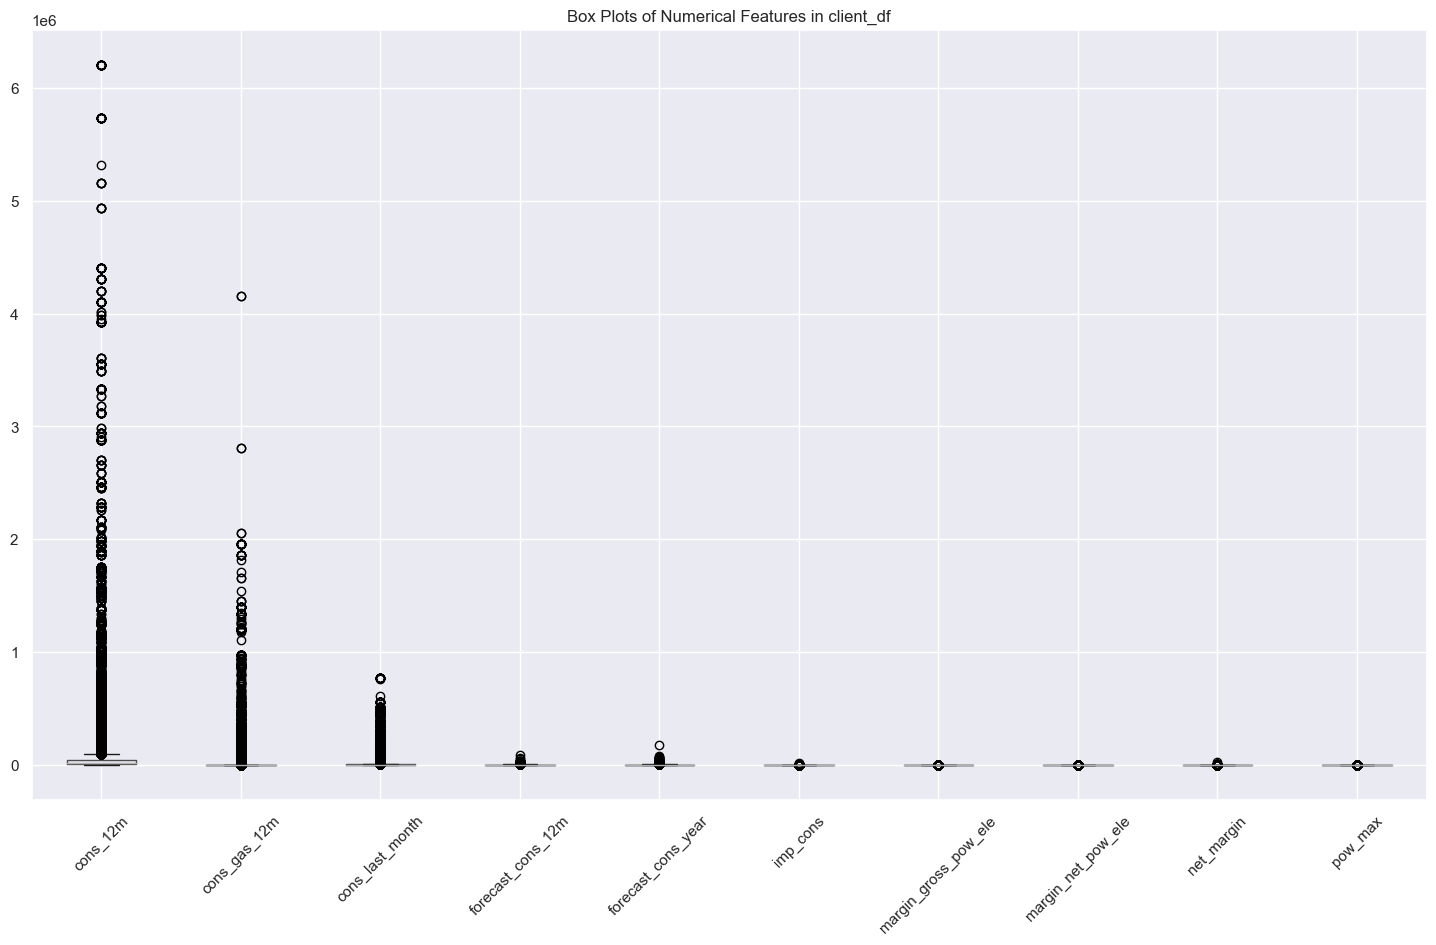

In [17]:
# Due to our last histogram of customer tenure, lets investigate outlier further before feature engineering
# Visualize potential outliers in client_df using box plots
plt.figure(figsize=(18, 10))
client_df.boxplot(column=['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 
                          'forecast_cons_year', 'imp_cons', 'margin_gross_pow_ele', 
                          'margin_net_pow_ele', 'net_margin', 'pow_max'])
plt.title('Box Plots of Numerical Features in client_df')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Apply the IQR method to detect outliers for each column in client_df
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Loop through columns in client_df to find outliers
outlier_summary_client = {}
for column in ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 
               'forecast_cons_year', 'imp_cons', 'margin_gross_pow_ele', 
               'margin_net_pow_ele', 'net_margin', 'pow_max']:
    outliers = find_outliers_iqr(client_df, column)
    outlier_summary_client[column] = len(outliers)
    print(f"Outliers in {column}: {len(outliers)}")

# Print summary of outliers for client_df
print("Outlier summary for client_df:", outlier_summary_client
      
# outliers shows that some customers are consuming above average which shows another insights to our consumer behaviours 
    #( Hight value/ consumptions clients) other factors would be seasonsal usage, company size differences, or Billing errors 

SyntaxError: unexpected EOF while parsing (3339374872.py, line 24)

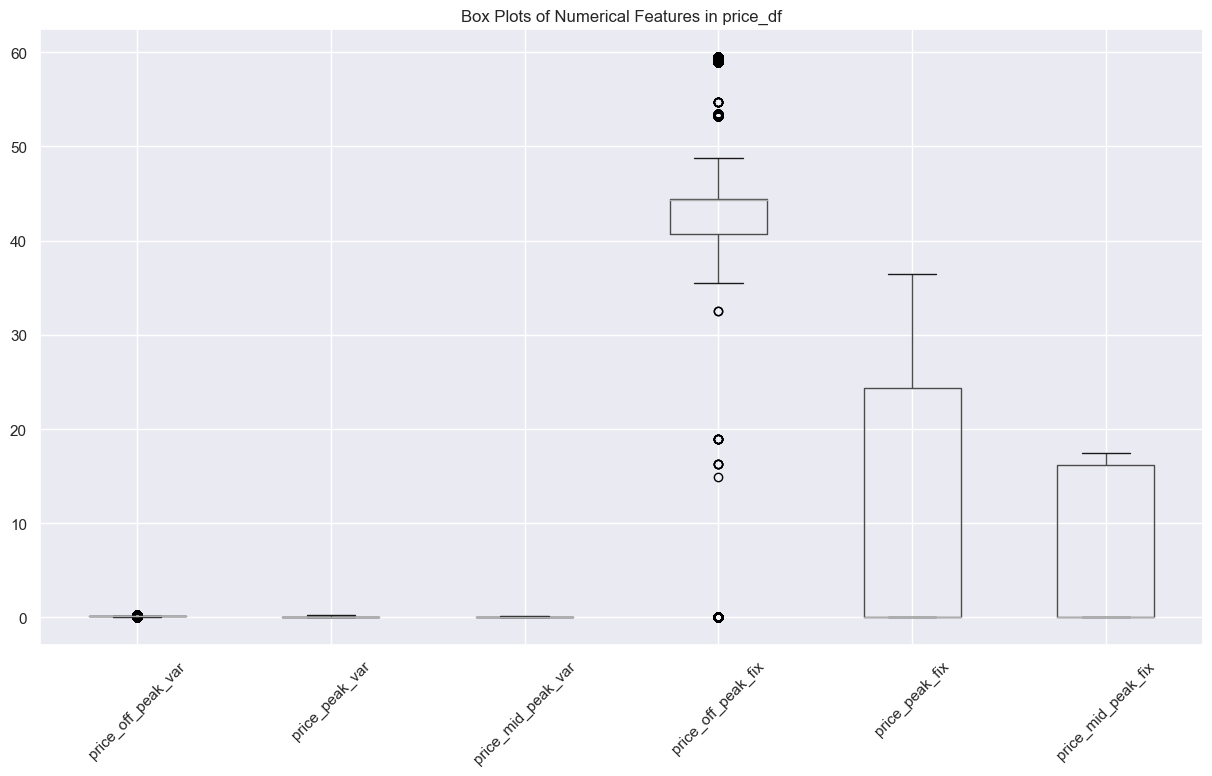

In [19]:
# Visualize potential outliers in price_df using box plots
plt.figure(figsize=(15, 8))
price_df.boxplot(column=['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
                         'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'])
plt.title('Box Plots of Numerical Features in price_df')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Loop through columns in price_df to find outliers
outlier_summary_price = {}
for column in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
               'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    outliers = find_outliers_iqr(price_df, column)
    outlier_summary_price[column] = len(outliers)
    print(f"Outliers in {column}: {len(outliers)}")

# Print summary of outliers for price_df
print("Outlier summary for price_df:", outlier_summary_price)

# The high number of outliers in price_off_peak_var and price_off_peak_fix suggests a skewed distribution 
# or that some values are much higher than typical ranges.
# If these prices don't align with company expectations, 
# they might indicate data entry issues or special cases (e.g., pricing errors or unusual contracts).



NameError: name 'find_outliers_iqr' is not defined

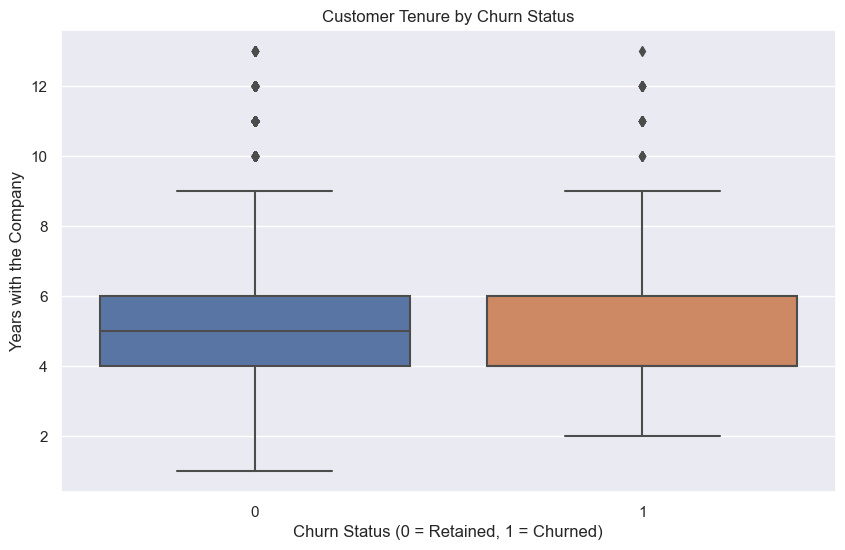

In [21]:
# Box plot of tenure by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='num_years_antig', data=client_df)
plt.title('Customer Tenure by Churn Status')
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Years with the Company')
plt.show()

# Our boxplot hsows that a significant battle btw Churn and rentention within 4 - 6 years


In [22]:
# Segment clients by tenure
client_df['tenure_segment'] = pd.cut(client_df['num_years_antig'], bins=[2, 4, 6, 10, 20], labels=['2-4', '4-6', '6-10', '10+'])

# Analyze key metrics by tenure segment
tenure_analysis = client_df.groupby('tenure_segment').agg({
    'churn': 'mean',
    'cons_12m': 'mean',
    'nb_prod_act': 'mean',
    'net_margin': 'mean'
})
print(tenure_analysis)
# 7% of clients churns after 4-6 years segments  and 10+ years segments 
# Highest elecricity is copnsumed for clients in the 4th - 6th year segments 
# Number of active product slight increase for 10+ years clients shows those clients are ready to adopt additional product
# show a higher net margin after 10 years due to increases as client continues with the company 
# Possible futher investigation: Are newer clients from different industries, or do they have different energy needs compared to long-standing clients? This insight could help tailor energy products to these needs.

                   churn       cons_12m  nb_prod_act  net_margin
tenure_segment                                                  
2-4             0.124864  128998.653157     1.290101  210.280706
4-6             0.076065  201632.546288     1.292972  162.657089
6-10            0.066242   62027.392357     1.270064  194.029185
10+             0.077922   65864.139610     1.376623  348.690584


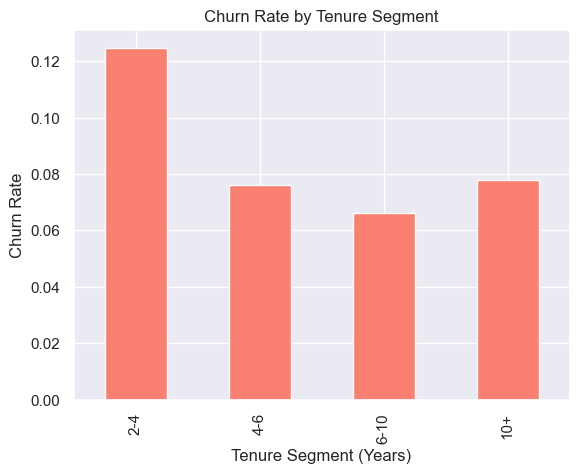

In [25]:
 #barchart to show the Churn rate by tenure segment
churn_by_tenure = client_df.groupby('tenure_segment')['churn'].mean()
churn_by_tenure.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Tenure Segment')
plt.xlabel('Tenure Segment (Years)')
plt.ylabel('Churn Rate')
plt.show()

In [24]:
#Calculate the average net margin per sales channel
channel_net_margin = client_df.groupby('channel_sales')['net_margin'].mean()
print(channel_net_margin)

# 2 channel have the highest average net margins at around 238 and 237, respectively.
# showing a mean tenure of 5.2 years and mean tenure of 3 years.
# channel has the lowest average net margin (around 144), along with a moderate tenure average of about 4 years.

channel_sales
MISSING                             170.046639
epumfxlbckeskwekxbiuasklxalciiuu    188.313333
ewpakwlliwisiwduibdlfmalxowmwpci    163.215767
fixdbufsefwooaasfcxdxadsiekoceaa    236.990000
foosdfpfkusacimwkcsosbicdxkicaua    199.153487
lmkebamcaaclubfxadlmueccxoimlema    238.470846
sddiedcslfslkckwlfkdpoeeailfpeds    188.930000
usilxuppasemubllopkaafesmlibmsdf    143.651367
Name: net_margin, dtype: float64


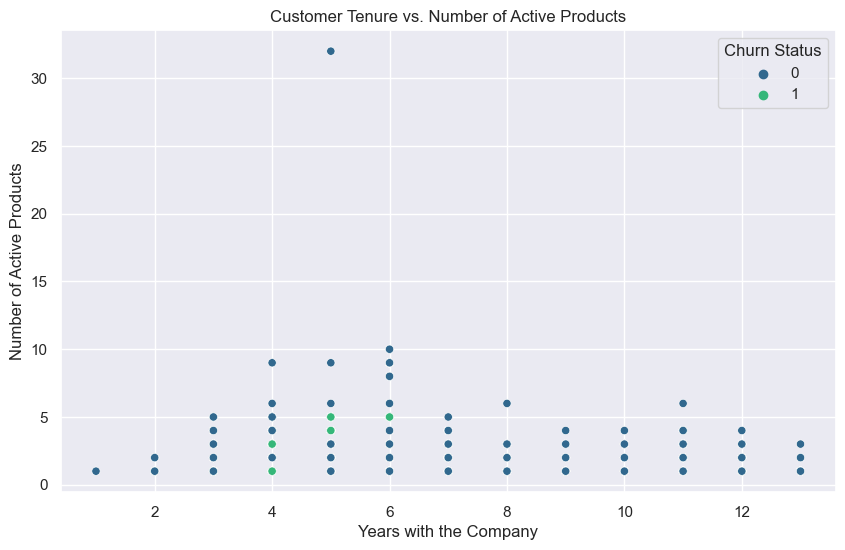

In [26]:
# Scatter plot of tenure vs. number of products
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_years_antig', y='nb_prod_act', data=client_df, hue='churn', palette='viridis')
plt.title('Customer Tenure vs. Number of Active Products')
plt.xlabel('Years with the Company')
plt.ylabel('Number of Active Products')
plt.legend(title='Churn Status')
plt.show()

# the scatterplot shows that number of active product and services increases when a client stays longer than 3 years with the company.


In [27]:
#Futher cleaning of the data to complete to be able to apply ML models 
df = pd.read_csv('/Users/apple/Downloads/clean_data_after_eda.csv')
#df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
#df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
#df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
#df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [28]:
df.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000,0


In [29]:
# FEATURE ENGINEERING
# Diff btw Off peak prices in december and Preceding January 
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [30]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Extract specific January and December records
jan_prices = monthly_price_by_id[monthly_price_by_id['price_date'].dt.month == 1]
dec_prices = monthly_price_by_id[monthly_price_by_id['price_date'].dt.month == 12]

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head
# for Energy diff shows a positive of 0.50443 (5%) for ID 2 which indicate increase in PRICE for energy and 
# negatives which indicate a decrease in price >>> we had more negatives ( decreases in price)
# for power diff more positive than negatives which means we had more prices hikes in this comparison , power shoes a reason to trigger churns
# Seasonality effect: december has more demand due to colder weather which can lead to more hikes, if cudtomer percieves this increase as exhorbitant they would churn.
# for example ID 2 is currently experiencing increase in energy and power during offpeak hours, this is a reason why he would churn.


<bound method NDFrame.head of                                      id  offpeak_diff_dec_january_energy  \
0      0002203ffbb812588b632b9e628cc38d                        -0.006192   
1      0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2      0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3      0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4      00114d74e963e47177db89bc70108537                        -0.003994   
...                                 ...                              ...   
16063  ffef185810e44254c3a4c6395e6b4d8a                        -0.050232   
16064  fffac626da707b1b5ab11e8431a4d0a2                        -0.003778   
16065  fffc0cacd305dd51f316424bbb08d1bd                        -0.001760   
16066  fffe4f5646aa39c7f97f95ae2679ce64                        -0.009391   
16067  ffff7fa066f1fb305ae285bb03bf325a                        -0.009528   

       offpeak_diff_dec_january_power  
0                

In [31]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

# features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, 
# whereas inter-time-period features may reveal patterns on a micro scale between months.


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,2.086425,9.953056e+01,4.423670e+01,1,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.009485,1.217891e-03,0.000000e+00,0,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [32]:
# Calculate cumulative price increase over time for each customer
price_df = price_df.sort_values(by=['id', 'price_date'])
price_df['pct_change_off_peak_energy'] = price_df.groupby('id')['price_off_peak_var'].pct_change().fillna(0)
cumulative_price_increase = price_df.groupby('id')['pct_change_off_peak_energy'].sum().reset_index()
cumulative_price_increase.columns = ['id', 'cumulative_off_peak_price_increase']
cumulative_price_increase.head(8)

# This shows that some customers have experienced a cumulative decrease in off-peak prices, 
# while others have seen an increase.
# Customers with a cumulative price increase may feel the impact of rising costs and could be more inclined to churn, 
# especially if they perceive better offers from competitors or if the increase affects their overall budget.


,id,cumulative_off_peak_price_increase
0,0002203ffbb812588b632b9e628cc38d,-0.048110
1,0004351ebdd665e6ee664792efc4fd13,-0.027648
2,0010bcc39e42b3c2131ed2ce55246e3c,0.337268
3,0010ee3855fdea87602a5b7aba8e42de,-0.082406
4,00114d74e963e47177db89bc70108537,-0.026634
5,00126c87cf78d7604278f0a9adeb689e,-0.105001
6,0013f326a839a2f6ad87a1859952d227,-0.047301
7,00184e957277eeef733a7b563fdabd06,-0.027483


In [ ]:
#Price volatility represents the standard deviation of off-peak prices over time for each customer. 
# High volatility can be indicative of unstable or unpredictable pricing.

# Calculate price volatility for off-peak variable prices
price_volatility = price_df.groupby('id').agg({
    'price_off_peak_var': 'std'
}).reset_index()
price_volatility.columns = ['id', 'std_off_peak_energy']
price_volatility.head(8)

# Relastively high volatitlity prices like Customer ID 2  in off-peak energy prices might lead to customer dissatisfaction, 
# as customers generally prefer predictable and stable pricing. 

In [ ]:

#explore the correlation between these differences and the actual churn status of customers to see if those 
# who experienced significant price increases are more likely to churn.

# Merge the diff dataframe with churn data
churn_analysis = pd.merge(diff, client_df[['id', 'churn']], on='id')
# Check correlation
correlation_energy = churn_analysis[['offpeak_diff_dec_january_energy', 'churn']].corr()
correlation_power = churn_analysis[['offpeak_diff_dec_january_power', 'churn']].corr()

print("Correlation with Churn:")
print("Energy Price Difference:", correlation_energy)
print("Power Price Difference:", correlation_power)

# The lack of a strong correlation indicates that price differences between December and January 
# for both energy and power) are not primary drivers of customer churn.


In [ ]:

# Step 1: Calculate Cumulative Off-Peak Price
# Group by 'id' and calculate the cumulative sum of 'price_off_peak_var'
cumulative_off_peak = price_df.groupby('id')['price_off_peak_var'].sum().reset_index()
cumulative_off_peak.columns = ['id', 'cumulative_off_peak_price']

# Step 2: Calculate Price Volatility
# Group by 'id' and calculate the standard deviation of 'price_off_peak_var'
price_volatility = price_df.groupby('id')['price_off_peak_var'].std().reset_index()
price_volatility.columns = ['id', 'off_peak_price_volatility']

# Step 3: Merge with Churn Data
# Merge with client_df to include churn information
client_prices = client_df[['id', 'churn']].merge(cumulative_off_peak, on='id', how='left')
client_prices = client_prices.merge(price_volatility, on='id', how='left')

# Step 4: Analyze Correlation
# Calculate correlation matrix
correlation_matrix = client_prices[['cumulative_off_peak_price', 'off_peak_price_volatility', 'churn']].corr()
print("Correlation Matrix:\n", correlation_matrix)

#Cumulative Off-Peak Price and Price Volatility don't appear to be major drivers of churn. The correlations with churn are very weak, 
# suggesting that customers are not leaving the company mainly due to the cumulative cost of off-peak energy or due to how much those prices fluctuate.
# These findings suggest that price alone might not be a sufficient indicator to explain churn.
# We may need to explore other factors

In [ ]:
#Step 1: Calculate Cumulative Peak Price
# Group by 'id' and calculate the cumulative sum of 'price_peak_var'
cumulative_peak = price_df.groupby('id')['price_peak_var'].sum().reset_index()
cumulative_peak.columns = ['id', 'cumulative_peak_price']

# Step 2: Calculate Peak Price Volatility
# Group by 'id' and calculate the standard deviation of 'price_peak_var'
peak_price_volatility = price_df.groupby('id')['price_peak_var'].std().reset_index()
peak_price_volatility.columns = ['id', 'peak_price_volatility']

# Step 3: Merge with Churn Data
# Merge with client_df to include churn information
client_prices_peak = client_df[['id', 'churn']].merge(cumulative_peak, on='id', how='left')
client_prices_peak = client_prices_peak.merge(peak_price_volatility, on='id', how='left')

# Step 4: Analyze Correlation
# Calculate correlation matrix for peak price-related features
correlation_matrix_peak = client_prices_peak[['cumulative_peak_price', 'peak_price_volatility', 'churn']].corr()
print("Correlation Matrix for Peak Prices:\n", correlation_matrix_peak)


In [ ]:
# TENURE : How long a company has been a client of PowerCo. 
# Convert 'date_activ' and 'date_end' columns to datetime format
df['date_activ'] = pd.to_datetime(df['date_activ'], errors='coerce')
df['date_end'] = pd.to_datetime(df['date_end'], errors='coerce')

# Now calculate tenure
df['tenure'] = ((df['date_end'] - df['date_activ']) / np.timedelta64(1, 'Y')).astype(int)

# Check the result
df[['date_activ', 'date_end', 'tenure']].head()


In [ ]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

# We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. 
# Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. 
# Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 


In [ ]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [ ]:
# Create reference date
from datetime import datetime

# Assuming the 'convert_months' function works with pandas' Timestamps and returns integers
def convert_months(reference_date, df, column_name):
    """
    This function takes a reference date, a dataframe, and a column name (which should be a date column),
    and calculates the number of months between the reference date and the date in the column.
    """
    # Ensure the column is in datetime format
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

    # Calculate the number of months difference
    delta = df[column_name] - reference_date
    # Convert the difference into months and return as integer
    return delta.dt.days // 30  # Approximation of months (30 days per month)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')  # The negative sign should work now
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [ ]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

In [ ]:
#Change categorical values into binary figure when Preparing Data for machine learning.
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

In [ ]:
### Transforming categorical data

#A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

#The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

#Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [ ]:
# First I want to see the statistics of the skewed features, so that we can compare before and after transformation

skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

# We can see that the standard deviation for most of these features is quite high.

In [ ]:
# to a continuous numeric column and you will notice the distribution changes. 
# For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)



df[skewed].describe()

# Now we can see that for the majority of the features, 
# their standard deviation is much lower after transformation. 
# This is a good thing, it shows that these features are more stable and predictable now.

# Let's quickly check the distributions of some of these features too.


In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

In [ ]:
Correlation = df.corr()

In [ ]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    Correlation, 
    xticklabels=Correlation.columns.values,
    yticklabels=Correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# Unstack the correlation matrix
corr_unstacked = Correlation.abs().unstack()

# Filter out self-correlations
corr_filtered = corr_unstacked[corr_unstacked < 0.80]

# Sort by highest correlation values
sorted_corr = corr_filtered.sort_values(ascending=False)

# Extract top N correlated pairs (e.g., top 10)
top_n = 20
top_correlated_pairs = sorted_corr.head(top_n)

# Display the result
print("Top Correlated Pairs:")
print(top_correlated_pairs)

In [ ]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year', 'cons_last_month', 'imp_cons', 'forecast_price_energy_off_peak', 'forecast_cons_year', 'off_peak_peak_fix_mean_diff', 'var_year_price_off_peak', 'var_6m_price_off_peak_var' ])
df.head()

In [33]:
df = pd.read_csv('/Users/apple/Downloads/data_for_predictions.csv')

In [35]:
#Import the librariries for model prediction
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 62)
(14606,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 62)
(10954,)
(3652, 62)
(3652,)


In [41]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42) # Add parameters to the model!
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) # Complete this method call!

In [42]:
# Generate predictions here!
print("Accuracy:", f"{round(model.score(X_test, y_test), 4):.2%}")

Accuracy: 89.98%


In [43]:
# Calculate performance metrics here!: Feature Importance
for name, score in zip(X.columns, model.feature_importances_):
    print(f"{score:.2%}",":",name)
        
#Analyzing the importance of each feature will provide us with a comprehensive understanding. 
#Notably, "Margin_gross_pow_ele |Margin_net_pow_ele  " significantly contributes to churn, accounting for 46.67% of its explanation.

2.26% : Unnamed: 0
2.61% : cons_12m
0.30% : cons_gas_12m
1.72% : cons_last_month
2.10% : forecast_cons_12m
0.08% : forecast_discount_energy
3.68% : forecast_meter_rent_12m
2.21% : forecast_price_energy_off_peak
1.20% : forecast_price_energy_peak
0.23% : forecast_price_pow_off_peak
0.14% : has_gas
1.30% : imp_cons
10.35% : margin_gross_pow_ele
10.35% : margin_net_pow_ele
0.30% : nb_prod_act
3.51% : net_margin
2.08% : pow_max
2.15% : var_year_price_off_peak_var
1.00% : var_year_price_peak_var
0.64% : var_year_price_mid_peak_var
1.04% : var_year_price_off_peak_fix
0.50% : var_year_price_peak_fix
0.57% : var_year_price_mid_peak_fix
1.92% : var_year_price_off_peak
1.07% : var_year_price_peak
0.72% : var_year_price_mid_peak
1.23% : var_6m_price_off_peak_var
0.57% : var_6m_price_peak_var
0.34% : var_6m_price_mid_peak_var
0.70% : var_6m_price_off_peak_fix
0.38% : var_6m_price_peak_fix
0.23% : var_6m_price_mid_peak_fix
1.46% : var_6m_price_off_peak
0.64% : var_6m_price_peak
0.35% : var_6m_price

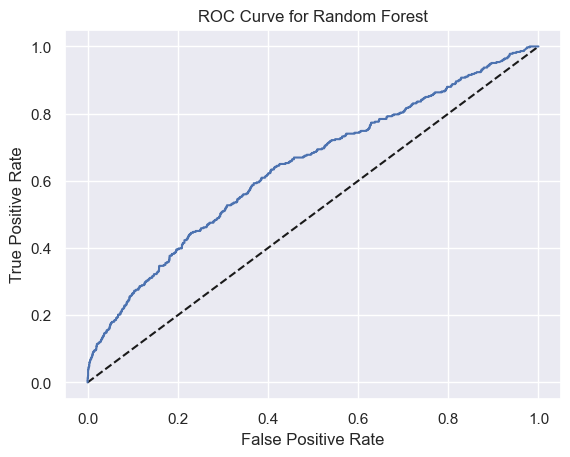

In [44]:
#To visualize its performance, let's plot the Receiver Operating Characteristic (ROC) curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [ ]:
# Our results have demonstrated a high level of accuracy, with the Random Forest classifier achieving a prediction accuracy of 89.98%. 
#Additionally, we have identified the feature importance within the dataset, with the highest importance assigned to "Margin_gross" (46.67%). 
# It is noteworthy that the remaining features collectively contribute to the prediction power, ensuring a comprehensive analysis.